In [13]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [14]:
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [15]:
# эти столбцы представлены в строковом виде, поэтому их нужно привести в числовой, то есть формализовать, чтобы с ними можно было как-то работать
COLUMNS_FOR_FACTORISATION = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService',
                             'OnlineSecurity']
# лишние столбцы
COLUMNS_FOR_DELETE = ['customerID', 'gender', 'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                      'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                      'MonthlyCharges', 'TotalCharges', 'Churn']
factorization_table = {}

In [16]:
# в датасете несколько тысяч записей, поэтому выберем 200, чтобы можно было графически представить их
dataset = dataset[200:400]

In [17]:
# удаляем столбцы
dataset.drop(
    COLUMNS_FOR_DELETE,
    axis=1,
    inplace=True,
)

In [18]:
# факторизуем строковые столбцы
for column in dataset.columns:
    if column in COLUMNS_FOR_FACTORISATION:
        dataset[column], table = pd.factorize(dataset[column]) 
        factorization_table[column] = pd.DataFrame(
            columns=[column],
            data=table
        )

<AxesSubplot: >

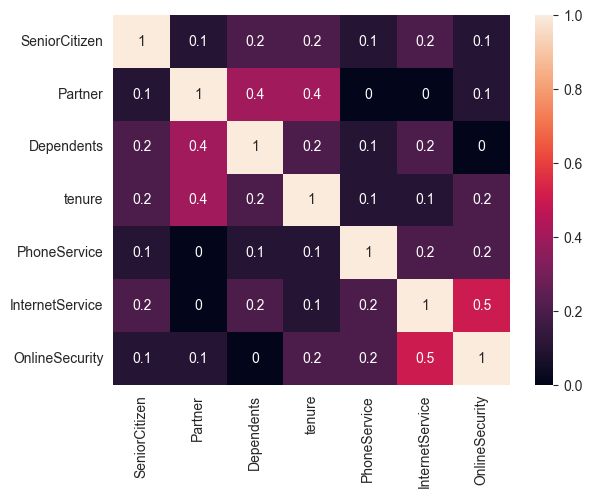

In [19]:
# выводим матрицу корреляции, чтобы оценить влияние одних факторов на другие
sns.heatmap(
    round(
        abs(dataset.corr()),
        1,
    ),
    annot=True
)

In [20]:
# делим датасет на обучающую и тестовую выборки
train_input, test_input, train_output, test_output = train_test_split(
    dataset.drop('tenure', axis=1),
    dataset['tenure'],
    test_size=0.2
)

In [21]:
# создаём модель 
model = tree.DecisionTreeClassifier()

In [22]:
# обучаем модель
model.fit(train_input, train_output)

DecisionTreeClassifier()

Text(0.5, 1.0, 'Матрица сходства')

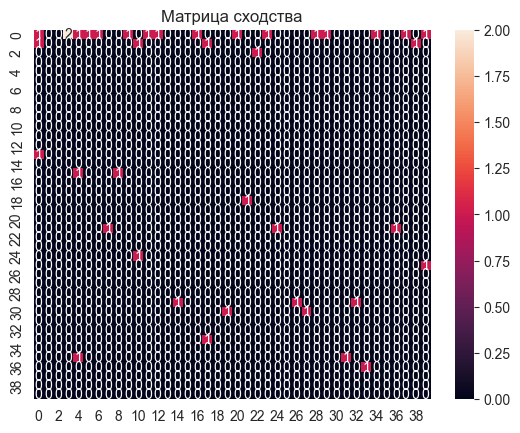

In [23]:
# получаем предсказания 
predictions = model.predict(test_input)
# строим матрицу сходства
confusion_matrix = sklearn.metrics.confusion_matrix(predictions, test_output)
sns.heatmap(
    confusion_matrix,
    annot=True
)
plt.title('Матрица сходства')

Text(0.5, 1.0, 'Дерево решений')

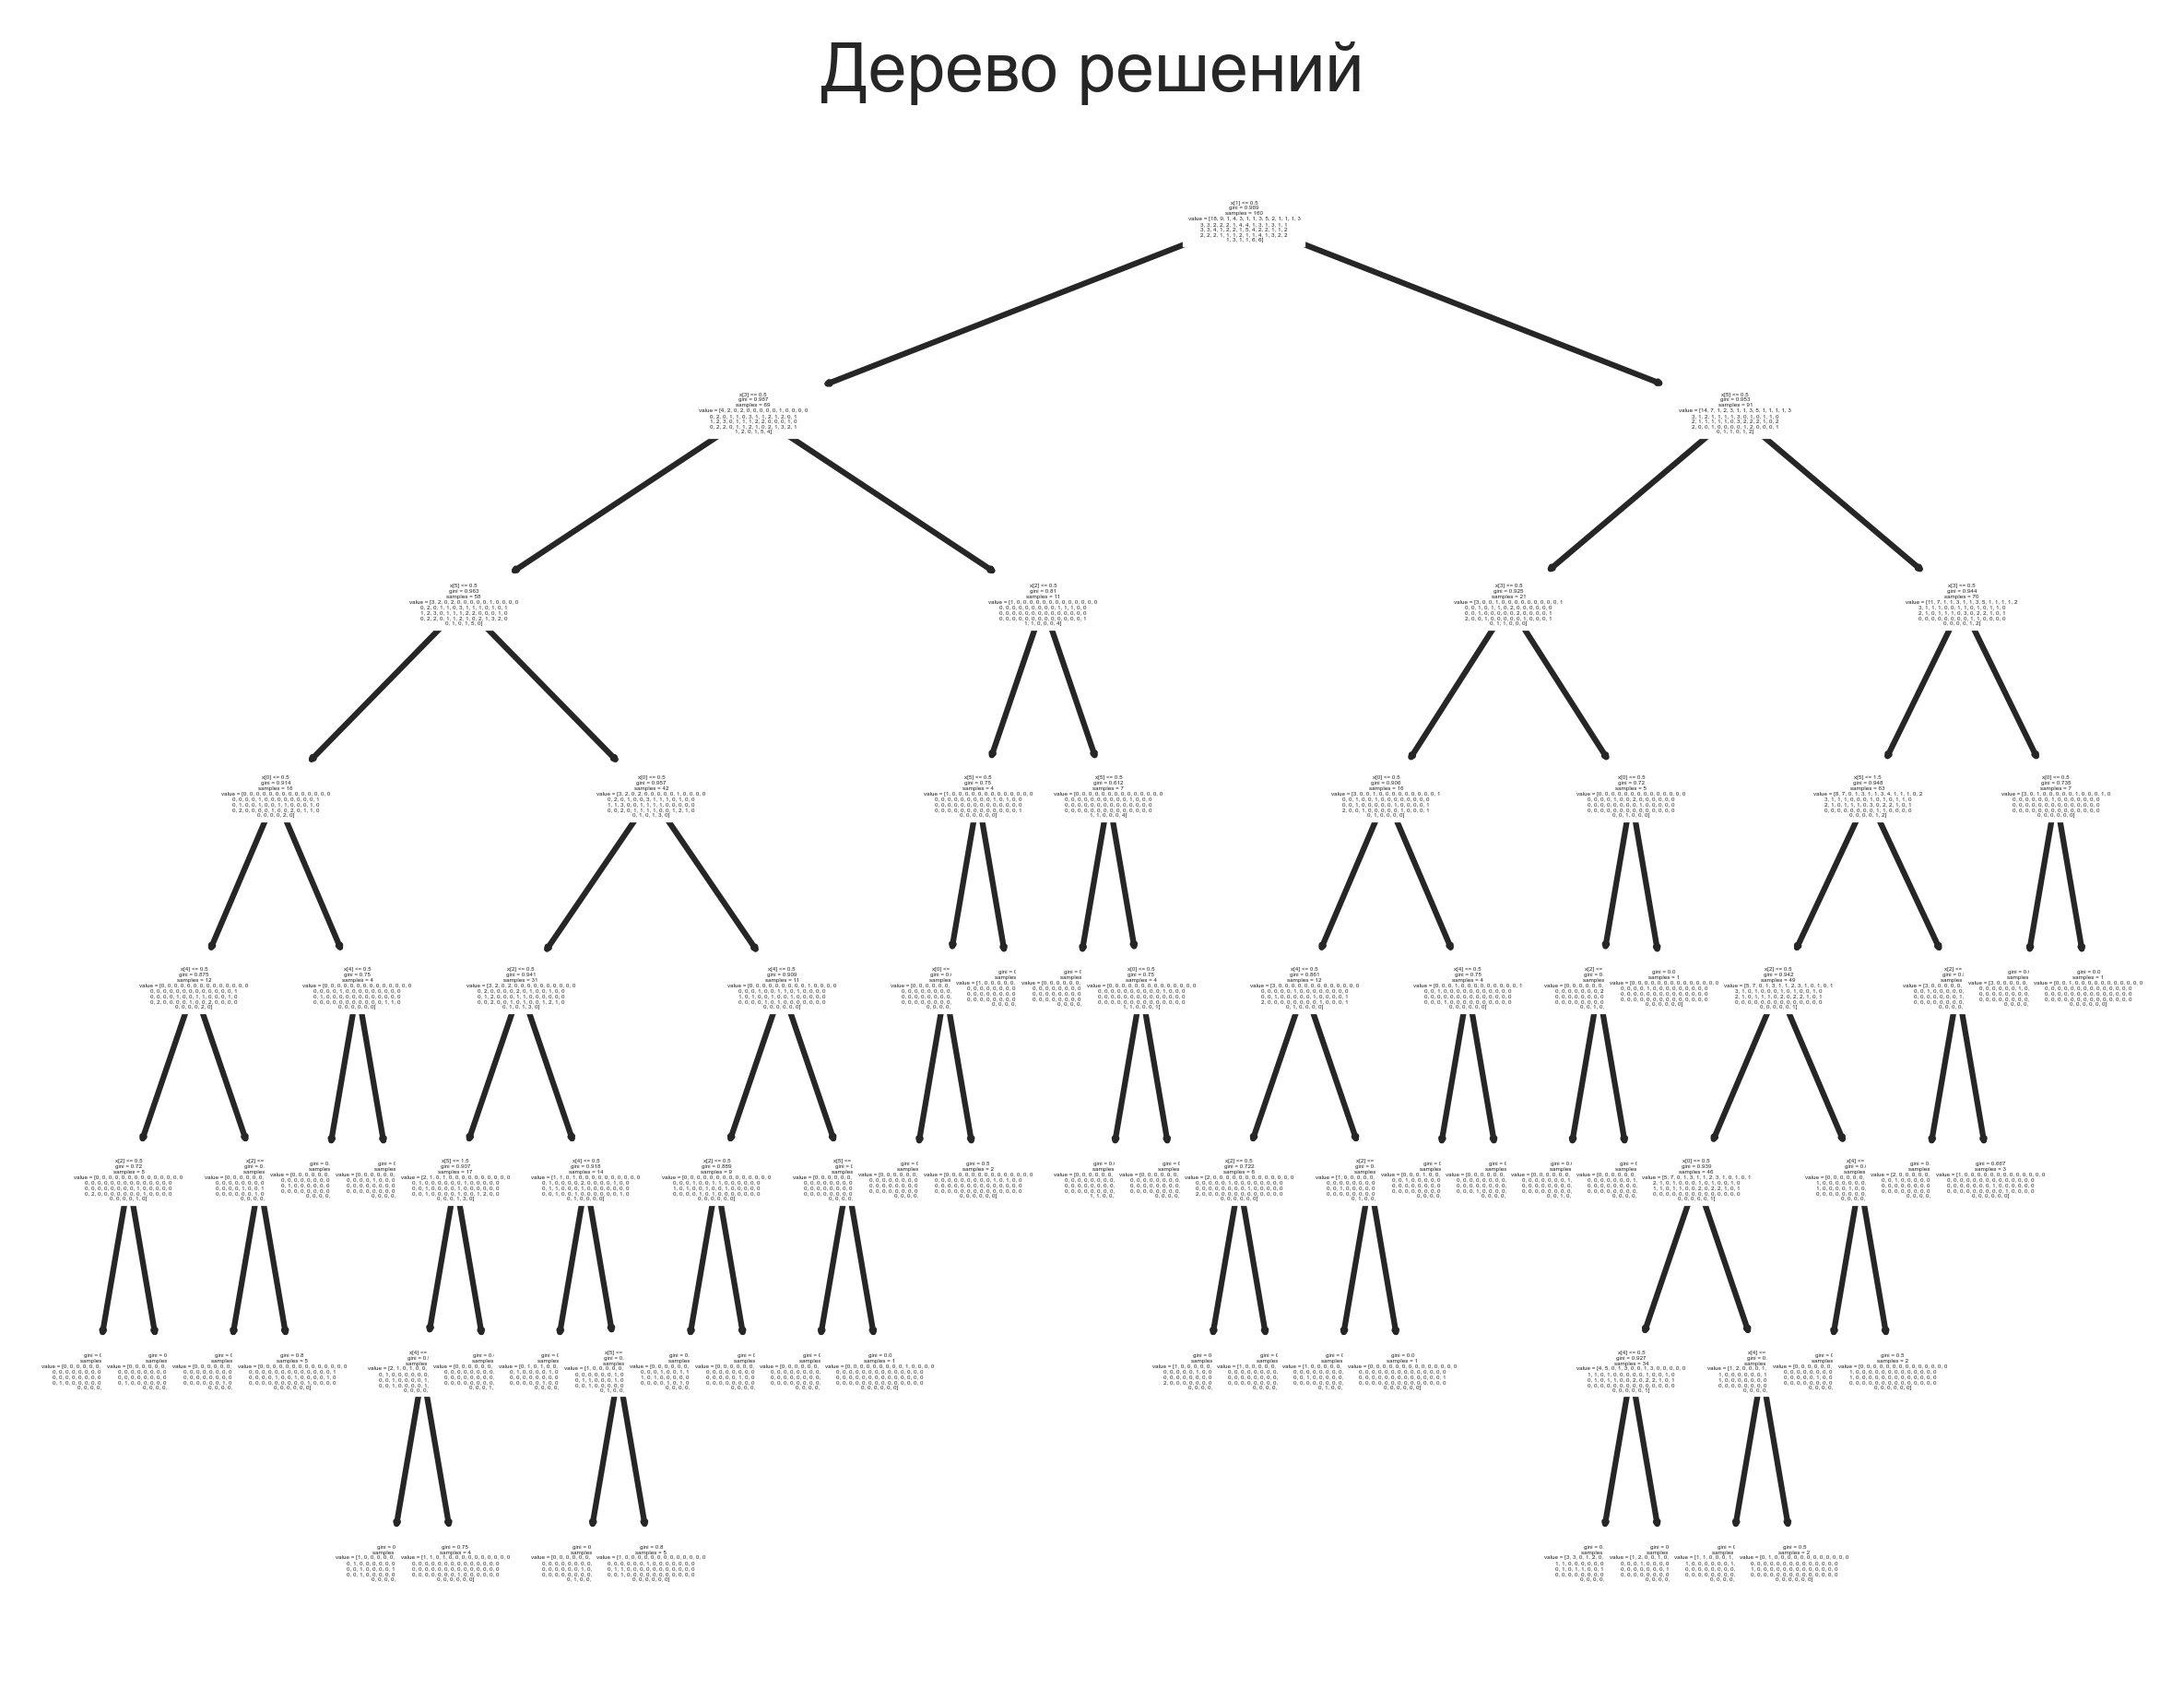

In [24]:
# графически представляем дерево решений
DPI = 450
plt.figure(dpi=DPI)
tree.plot_tree(model)
plt.title("Дерево решений")